In [1]:
import pandas as pd

In [2]:
from datetime import datetime


In [3]:
data= pd.read_csv("fremont-bridge.csv",index_col= 'Date')
data.head()

,West,East
Date,,
10/3/2012 0:00,4.0,9.0
10/3/2012 1:00,4.0,6.0
10/3/2012 2:00,1.0,1.0
10/3/2012 3:00,2.0,3.0
10/3/2012 4:00,6.0,1.0


In [4]:
date = datetime.strptime("2020-01-01 14:00", "%Y-%m-%d %H:%M")
data['Date']=date

In [5]:
data.head()

,West,East,Date
Date,,,
10/3/2012 0:00,4.0,9.0,2020-01-01 14:00:00
10/3/2012 1:00,4.0,6.0,2020-01-01 14:00:00
10/3/2012 2:00,1.0,1.0,2020-01-01 14:00:00
10/3/2012 3:00,2.0,3.0,2020-01-01 14:00:00
10/3/2012 4:00,6.0,1.0,2020-01-01 14:00:00


In [6]:
#data.columns=["West","East"]
data["Total"] = data["West"] + data["East"] 
data.head()


,West,East,Date,Total
Date,,,,
10/3/2012 0:00,4.0,9.0,2020-01-01 14:00:00,13.0
10/3/2012 1:00,4.0,6.0,2020-01-01 14:00:00,10.0
10/3/2012 2:00,1.0,1.0,2020-01-01 14:00:00,2.0
10/3/2012 3:00,2.0,3.0,2020-01-01 14:00:00,5.0
10/3/2012 4:00,6.0,1.0,2020-01-01 14:00:00,7.0


In [40]:
dates=data

In [7]:
data.head()
data.drop(['Date'], axis=1)

,West,East,Total
Date,,,
10/3/2012 0:00,4.0,9.0,13.0
10/3/2012 1:00,4.0,6.0,10.0
10/3/2012 2:00,1.0,1.0,2.0
10/3/2012 3:00,2.0,3.0,5.0
10/3/2012 4:00,6.0,1.0,7.0
...,...,...,...
12/31/2017 19:00,9.0,12.0,21.0
12/31/2017 20:00,6.0,8.0,14.0
12/31/2017 21:00,3.0,10.0,13.0


In [10]:
data1= data.drop(['Date'],axis=1)

In [17]:
data.head()

,West,East,Date,Total
Date,,,,
10/3/2012 0:00,4.0,9.0,2020-01-01 14:00:00,13.0
10/3/2012 1:00,4.0,6.0,2020-01-01 14:00:00,10.0
10/3/2012 2:00,1.0,1.0,2020-01-01 14:00:00,2.0
10/3/2012 3:00,2.0,3.0,2020-01-01 14:00:00,5.0
10/3/2012 4:00,6.0,1.0,2020-01-01 14:00:00,7.0


In [11]:
data1.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


# Visualizing the data

In [8]:
import matplotlib.pyplot as plt
import seaborn

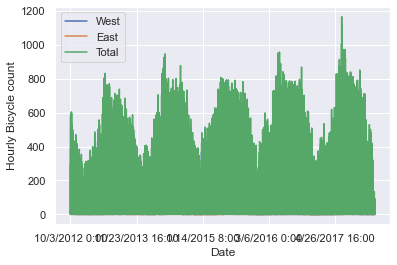

In [12]:
seaborn.set()
data1.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let’s resample by week:

In [16]:
weekly = data1.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [41]:
dates.head()

,West,East,Date,Total
Date,,,,
10/3/2012 0:00,4.0,9.0,2020-01-01 14:00:00,13.0
10/3/2012 1:00,4.0,6.0,2020-01-01 14:00:00,10.0
10/3/2012 2:00,1.0,1.0,2020-01-01 14:00:00,2.0
10/3/2012 3:00,2.0,3.0,2020-01-01 14:00:00,5.0
10/3/2012 4:00,6.0,1.0,2020-01-01 14:00:00,7.0


In [43]:
dates['date']=dates.rename(dates['Date'])

ValueError: cannot reindex from a duplicate axis

In [39]:
dates.drop(['Date'],axis=1)

,West,East,Total
Date,,,
10/3/2012 0:00,4.0,9.0,13.0
10/3/2012 1:00,4.0,6.0,10.0
10/3/2012 2:00,1.0,1.0,2.0
10/3/2012 3:00,2.0,3.0,5.0
10/3/2012 4:00,6.0,1.0,7.0
...,...,...,...
12/31/2017 19:00,9.0,12.0,21.0
12/31/2017 20:00,6.0,8.0,14.0
12/31/2017 21:00,3.0,10.0,13.0
